In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import GlobalAvgPool2D, Conv2D, Dropout, MaxPool2D

from tensorflow.keras.utils import to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
y_train_cat = to_categorical(y_train)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
class_names = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

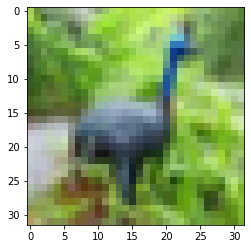

In [8]:
plt.imshow(X_train[6])
plt.show()

#### Define CNN

In [9]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3), filters=8, kernel_size=(3,3), activation="relu"))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPool2D())

model.add(Conv2D(filters=24, kernel_size=(3,3), activation="relu"))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(Dropout(0.25))

model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

model.add(GlobalAvgPool2D())

model.add(Dense(units=128, activation="tanh"))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation="tanh"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 24)        3480      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 24)        0

##### Use GPU for faster training

In [11]:
model.fit(X_train, y_train_cat, epochs=30, validation_split=0.1)

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7433 - acc: 0.3421 - val_loss: 1.5220 - val_acc: 0.4528
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4199 - acc: 0.4804 - val_loss: 1.3303 - val_acc: 0.5176
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2769 - acc: 0.5399 - val_loss: 1.2371 - val_acc: 0.5644
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1958 - acc: 0.5739 - val_loss: 1.2625 - val_acc: 0.5574
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1343 - acc: 0.5964 - val_loss: 1.1691 - val_acc: 0.5858
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0877 - acc: 0.6157 - val_loss: 1.1286 - val_acc: 0.6132
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0433 - acc: 0.6310 - val_loss: 1.0963 - val_acc: 0.6194
Epoch 8/30
1407/1407 [==============================] - 7s 5ms

In [12]:
y_pred = model.predict(X_test)

In [13]:
def plot_image(i, y_pred, y_test_class, img, class_names):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)   


In [14]:
#y-test was orginally 2-dimensional - shape (10000, 1)
#converting into 1-D to fit above plotting function
y_test = y_test.reshape(10000)

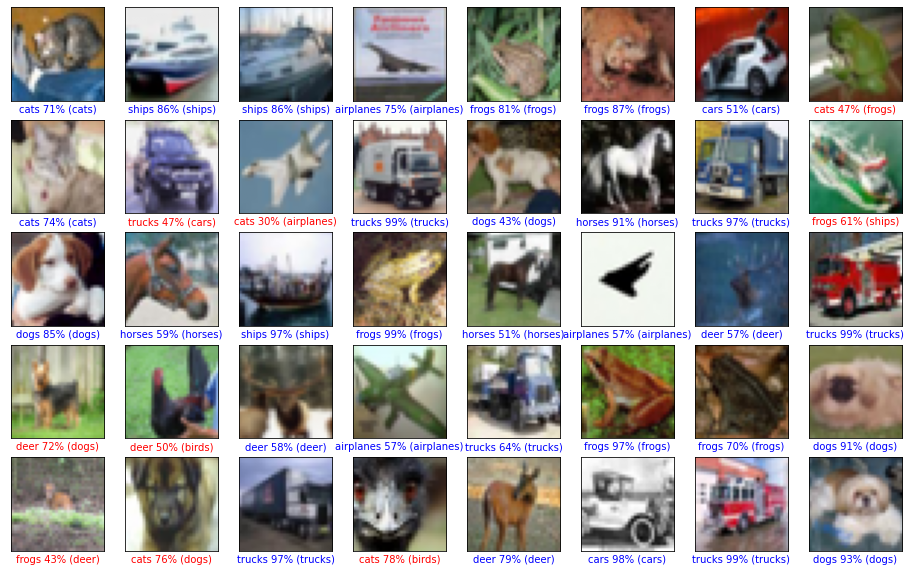

In [15]:
num_rows = 5
num_cols = 8

num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test, class_names)
plt.show() 

## Visualizing Activation Maps produced by Filters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


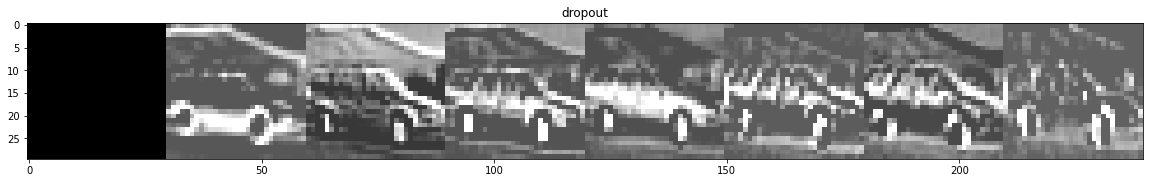

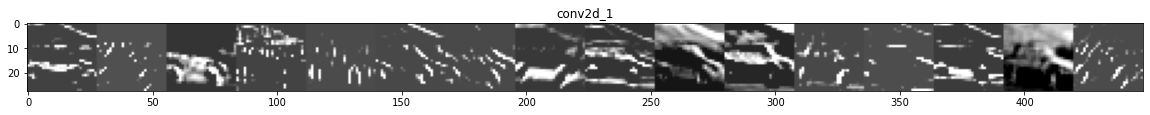

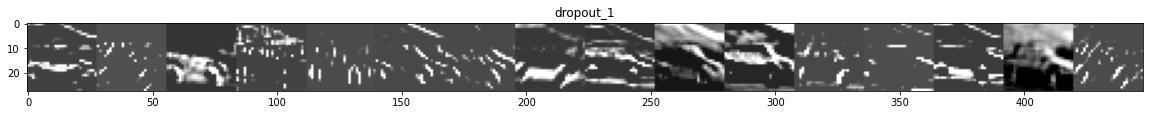

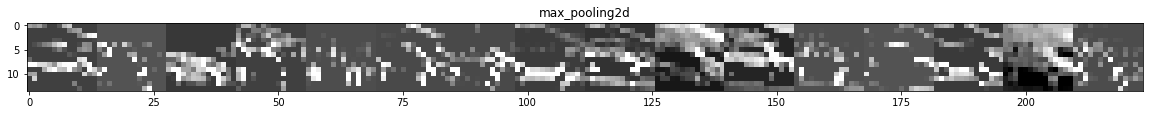

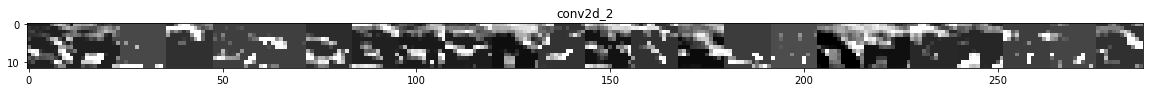

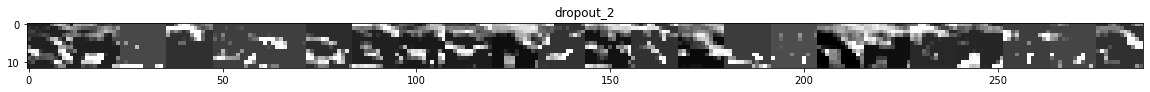

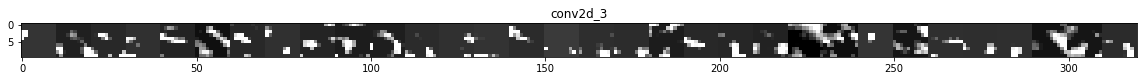

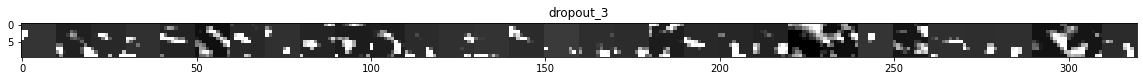

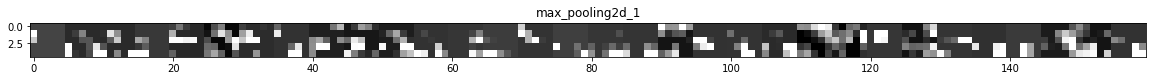

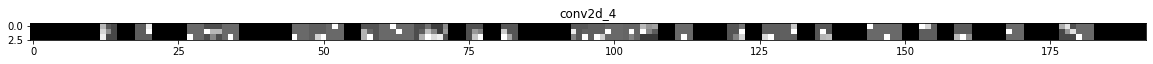

In [16]:
import numpy as np
import random
from tensorflow.keras.models import Model

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model.input, outputs = successive_outputs)

# Let's use random input image from the training set.
x = X_train[[4]]

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap="binary_r")

## Using Pre-Trained Model

In [17]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import decode_predictions, preprocess_input

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array  

In [19]:
inception_res_net = InceptionResNetV2(weights="imagenet")

In [20]:
image = load_img("jeep.jpg", target_size=(299, 299, 3))

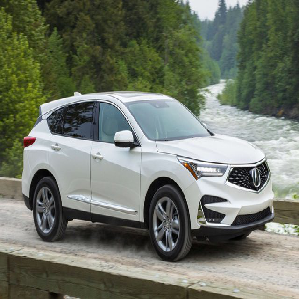

In [21]:
image

In [22]:
image_arr = img_to_array(image)

In [23]:
image_arr = preprocess_input(image_arr) # image_arr / 255

In [24]:
image_arr.shape

(299, 299, 3)

In [25]:
image_arr = image_arr.reshape(1, 299, 299, 3)

In [26]:
y_pred = inception_res_net.predict(image_arr)

In [27]:
y_pred.shape

(1, 1000)

In [28]:
decode_predictions(y_pred, top=5)

[[('n03770679', 'minivan', 0.7082656),
  ('n02814533', 'beach_wagon', 0.068302594),
  ('n02974003', 'car_wheel', 0.044880327),
  ('n03594945', 'jeep', 0.041159745),
  ('n03100240', 'convertible', 0.01694774)]]